In [ ]:
# Import necessary packages
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime 

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

# **Player data**
nflId: Player identification number, unique across players (numeric)

height: Player height (text)

weight: Player weight (numeric)

birthDate: Date of birth (YYYY-MM-DD)

collegeName: Player college (text)

position: Player position (text)

displayName: Player name (text)

In [ ]:
player = pd.read_csv("../input/nfl-big-data-bowl-2021/players.csv")


In [ ]:
player.info()

In [ ]:
player['height'].value_counts()

there are unwanted characters that should be removed/corrected from the height column before converting the column from object to numeric  

In [ ]:
player['height'] = player['height'].str.replace('[-]', '') 

In [ ]:
#convert the height column from object type to int 
player['height'] = pd.to_numeric(player['height'])

player.head(10)

In [ ]:
#sort the dataframe values from the height column 
player = player.sort_values(by=['weight'], ascending=False)
#convert birthdate column to age
#player['birthDate'] = pd.to_datetime(player['birthDate'], format='%m%d%y')
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
player['birthDate'] =  pd.to_datetime(player['birthDate'], infer_datetime_format=True)
player['age'] = player['birthDate'].apply(lambda x: from_dob_to_age(x))
player.head(10)

In [ ]:
player = player.sort_values(by=['age'], ascending=False)
player

player that are > 30 old years  : 255 players 

In [ ]:
player_30 = player[player['age'] > 30] 
player_30

**Analyzing Position variable **: 
https://abbreviations.yourdictionary.com/articles/football-positions-abbreviations-and-meanings.html

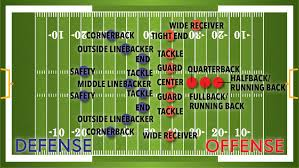


In [ ]:
player['position'].value_counts() 


1. **Abbreviations for Soccer Midfielder Positions**
* LW: Left Winger; Plays along sideline to shoot, assist, and score
**Abbreviations for Offense Positions**
* RB: Running Back; Can run the ball, make a catch, block, or even throw the ball 
* TE: Tight End; Blocks or catches passes
* QB: Quarterback; Calls the plays and initiates ball action
* HB: Halfback; Runs the ball or blocks, the other running back position

1. **Abbreviations for Special Teams Positions**
* P: Punter; Punts the ball to the opposing team
* LS: Long Snapper; Takes position of C for long snaps, as in the case of field goals and punts
1. **Abbreviations for Soccer Forward Positions**
* S: Striker; Focuses on scoring
* K: Kicker; Kicks field goals (FG) and extra points (XP)


1. **Abbreviations for Defense Positions :**
 * SS: Strong Safety; Stop TEs, RBs, and WRs; Tends to play closer to the DL than FS
 * FS: Free Safety; Stop TEs, RBs, and WRs; Tends to play further from the DL than FS, aligned with the offense’s TE
 * OLB: Outside Linebacker; Tackle ball carrier; Aligns toward outer portion of formation
 * CB: Center-back; Stop other team from getting near GK
 * LB: Linebacker; Tackle ball carrier; Sets up between DL and FS/SS
 * ILB: Inside Linebacker; Tackle ball carrier; Aligns toward inner portion of formation
 * DE: Defensive End; Get past OL, tackle QB, or tackle ball carriers; Sets up at either end of the DL
 * MLB: Middle Linebacker; Tackle ball carrier; Aligns in center of formation
 * DT: Defensive Tackle; Get past OL, tackle QB, or tackle ball carriers; Sets up in the middle of the DL
 * FB: Fullback; Lead blocker, one of two running back positions
 * S: Safety;  Stop TEs, RBs, and WRs; Sets up in the back of the formation
 * NT: Nose Tackle; Hold off as many OL players as possible; Sets up in the center of the DL

*Documentation*
**pandas.pivot_table**(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [ ]:
table = player.pivot_table(index=['position'], aggfunc='median')
table.head(10) 

In [ ]:
del table['nflId']
table.info()
table.hist()

In [ ]:
table.sort_values(by='weight',ascending=False).plot(kind='bar' ,figsize =(15,6), title ='positions grouped by age & weight')

 Nose Tackle  & Defensive tackle  & Defensive end  have the highest weights. 

# **Plays Analysis ******

In [ ]:
plays = pd.read_csv("../input/nfl-big-data-bowl-2021/plays.csv")
plays

**Play data**
* gameId: Game identifier, unique (numeric)
 
* playId: Play identifier, not unique across games (numeric)

* playDescription: Description of play (text)
 
* quarter: Game quarter (numeric)

* down: Down (numeric)
 
* yardsToGo: Distance needed for a first down (numeric)
 
* possessionTeam: Team on offense (text)
 
* playType: Outcome of dropback: sack or pass (text)

* yardlineSide: 3-letter team code corresponding to line-of-scrimmage (text)

* yardlineNumber: Yard line at line-of-scrimmage (numeric)
 
* offenseFormation: Formation used by possession team (text)
 
* personnelO: Personnel used by offensive team (text)

* defendersInTheBox: Number of defenders in close proximity to line-of-scrimmage (numeric)
 
* numberOfPassRushers: Number of pass rushers (numeric)
 
* personnelD: Personnel used by defensive team (text)
 
* typeDropback: Dropback categorization of quarterback (text)
 
* preSnapHomeScore: Home score prior to the play (numeric)
 
* preSnapVisitorScore: Visiting team score prior to the play (numeric)
 
* gameClock: Time on clock of play (MM:SS)
 
* absoluteYardlineNumber: Distance from end zone for possession team (numeric)
 
* penaltyCodes: NFL categorization of the penalties that ocurred on the play. For purposes of this contest, the most important penalties are Defensive Pass Interference (DPI), Offensive Pass Interference (OPI), Illegal Contact (ICT), and Defensive Holding (DH). Multiple penalties on a play are separated by a ; (text)
 
* penaltyJerseyNumber: Jersey number and team code of the player commiting each penalty. Multiple penalties on a play are separated by a ; (text)
 
* passResult: Outcome of the passing play (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, text)

* offensePlayResult: Yards gained by the offense, excluding penalty yardage (numeric)
 
* playResult: Net yards gained by the offense, including penalty yardage (numeric)
 
* epa: Expected points added on the play, relative to the offensive team. Expected points is a metric that estimates the average of every next scoring outcome given the play's down, distance, yardline, and time remaining (numeric)
 
* isDefensivePI: An indicator variable for whether or not a DPI penalty ocurred on a given play (TRUE/FALSE) 

In [ ]:
plays['playDescription'].value_counts() 